# Tripadvisor - Copenhagen restaurants

## Contents
* [1. Scraper info](#scraper)
* [2. The datasets](#datasets)
    * [2.1. TripStoresInfo.csv](#tripstoresinfo)
    * [2.2. TripReviews.csv](#tripreviews)
* [3. Business questions](#businessquestions)

In [51]:
#!pip install pandas_profiling

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

<a id='scraper'></a>
## 1. Scraper info

<a id="datasets"></a>
## 2. The datasets
The scraper is run...


The data is saved into two files:
1. **TripStoresInfo.csv**: Contains information about each resturant.
1. **TripReviews.csv**: Contains the reviews for each restaurant.

<a id="tripstoresinfo"></a>
### 2.1 TripStoresInfo.csv

**TripStoresInfo.csv** containts information about each restaurant. Namely:
* Restaurant name
* Address
* Average rating
* Number of reviews
* Price category
* List of cousine types the restaurant offers
* Rank

Let's examine how the data looks:

In [52]:
# Load and examine the restaurant info dataset
# Know that CousineType contains a list, so use converter to get it read in correctly
restaurants = pd.read_csv('TripStoresInfo.csv', 
                          converters={'CousineType':ast.literal_eval})
restaurants.head()

,storeName,storeAddress,avgRating,nrReviews,priceCategory,CousineType,Rank
0,Maple Casual Dining,"Vesterbrogade 24, Copenhagen 1620 Denmark",5.0,237,$$ - $$$,"[International, European, Vegetarian Friendly]",#1
1,Keyser Social,"Frederiksborggade 20d, Copenhagen 1360 Denmark",5.0,125,$$$$,"[Asian, Thai, Vegetarian Friendly]",#2
2,Restaurant Krebsegaarden,"Studiestraede 17, Copenhagen 1455 Denmark",5.0,"1,403",$$$$,"[European, Scandinavian, Danish]",#3
3,The Olive Kitchen & Bar,"Noerregade 22, Copenhagen 1165 Denmark",5.0,"2,413",$$ - $$$,"[International, European, Gluten Free Options]",#4
4,Ark,"Noerre Farimagsgade 63, Copenhagen 1364 Denmark",5.0,277,$$ - $$$,"[European, Contemporary, Healthy]",#5


The **priceCategory** column appears to be displaying in a weird way. However when a single row is printed, the correct format of the column can be seen.

In [53]:
restaurants.iloc[0]

storeName                                   Maple Casual Dining
storeAddress          Vesterbrogade 24, Copenhagen 1620 Denmark
avgRating                                                     5
nrReviews                                                   237
priceCategory                                          $$ - $$$
CousineType      [International, European, Vegetarian Friendly]
Rank                                                         #1
Name: 0, dtype: object

A clean-up needs to be performed before the dataset is used for further analysis. Since '$$' is a keyword in Matplotlib, the **priceCategory** column has to be mapped to something else. A mapping to integers was created, since they are a nice way to represent the data.

Additionally the **Rank** column is modified, in such a way that the '#' symbol is removed so the column can be converted from a string to integer. 

In [54]:
# Since the Pandas profiler can no display string with '$$' it is necessary to map the price categories differently
restaurants.priceCategory = restaurants.priceCategory.map({'$': 1, '$ - $$': 1.5, '$$': 2, '$$ - $$$': 2.5, '$$$': 3, '$$$ - $$$$': 3.5, '$$$$': 4, '$$$$ - $$$$$': 4.5, '$$$$$': 5})

# Remove the '#' in the front of the Rank column
restaurants.Rank = restaurants.Rank.apply(lambda x: x.replace('#','')).apply(lambda x: int(x))

In [55]:
restaurants.iloc[0]

storeName                                   Maple Casual Dining
storeAddress          Vesterbrogade 24, Copenhagen 1620 Denmark
avgRating                                                     5
nrReviews                                                   237
priceCategory                                               2.5
CousineType      [International, European, Vegetarian Friendly]
Rank                                                          1
Name: 0, dtype: object

In [56]:
# Generate a profile for the dataset and display it
restaurant_profile = ProfileReport(restaurants, title="Restaurants Info dataset", html={'style': {'full_width': True}});
restaurant_profile.to_notebook_iframe();

<font color='red'>**ADD DISCUSSION ON FINAL FINDINGS**</font>

From the profiler it can be seen that it does not handle a column containing a list. Therefore we do an additional check for the **CousineType** column.

In [57]:
restaurants.CousineType

0     [International, European, Vegetarian Friendly]
1                 [Asian, Thai, Vegetarian Friendly]
2                   [European, Scandinavian, Danish]
3     [International, European, Gluten Free Options]
4                  [European, Contemporary, Healthy]
5             [Pizza, European, Vegetarian Friendly]
6                 [Fast Food, International, Fusion]
7      [Seafood, International, Vegetarian Friendly]
8             [American, Diner, Vegetarian Friendly]
9           [Indian, Pakistani, Vegetarian Friendly]
10                   [Italian, Pizza, Mediterranean]
11                   [French, International, Danish]
12                          [European, Scandinavian]
13                [Italian, Mediterranean, European]
14                          [Cafe, European, Danish]
15                      [Seafood, European, Healthy]
16               [American, International, European]
17           [International, European, Contemporary]
18                  [European, Scandinavian, D

<AxesSubplot:>

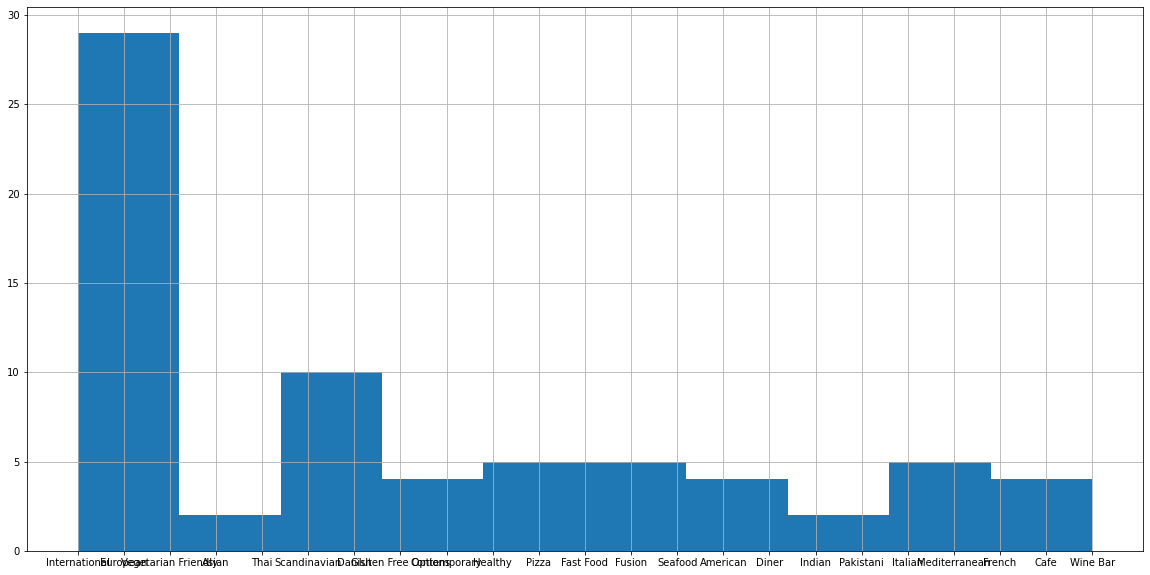

In [58]:
# Ugly test for the combos
restaurants.CousineType.apply(pd.Series).stack().hist(figsize=(20,10))

In [59]:
restaurants.CousineType

0     [International, European, Vegetarian Friendly]
1                 [Asian, Thai, Vegetarian Friendly]
2                   [European, Scandinavian, Danish]
3     [International, European, Gluten Free Options]
4                  [European, Contemporary, Healthy]
5             [Pizza, European, Vegetarian Friendly]
6                 [Fast Food, International, Fusion]
7      [Seafood, International, Vegetarian Friendly]
8             [American, Diner, Vegetarian Friendly]
9           [Indian, Pakistani, Vegetarian Friendly]
10                   [Italian, Pizza, Mediterranean]
11                   [French, International, Danish]
12                          [European, Scandinavian]
13                [Italian, Mediterranean, European]
14                          [Cafe, European, Danish]
15                      [Seafood, European, Healthy]
16               [American, International, European]
17           [International, European, Contemporary]
18                  [European, Scandinavian, D

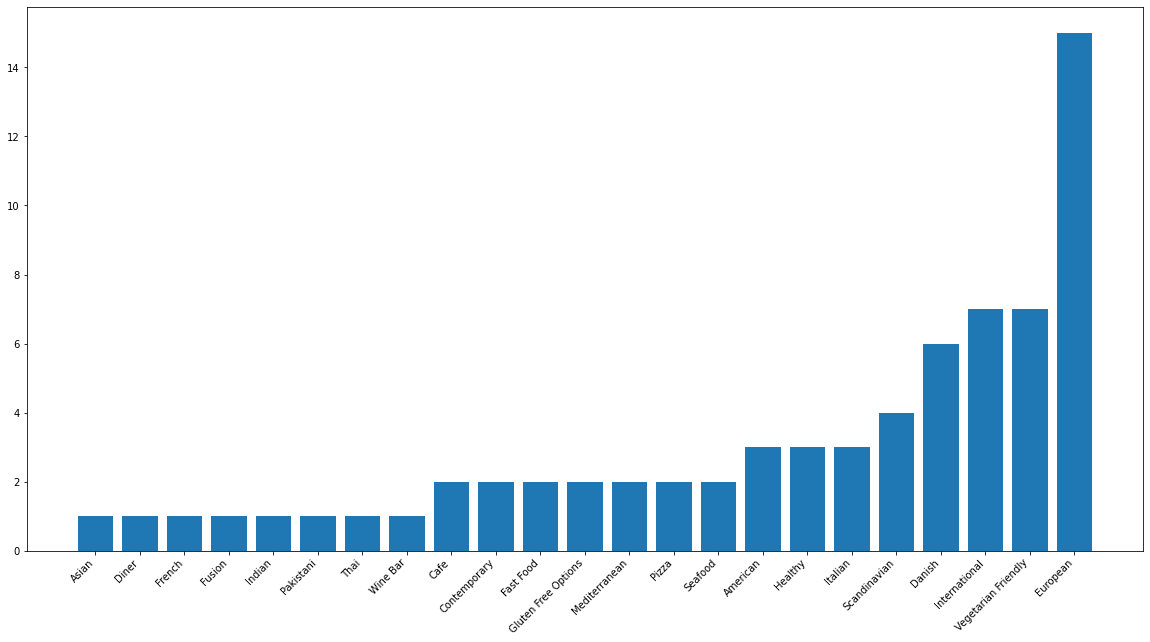

In [60]:
CousineTypeFlat = [y for x in restaurants.CousineType for y in x]

# https://stackoverflow.com/questions/49017002/bar-plot-based-on-list-of-string-values
keys, counts = np.unique(CousineTypeFlat, return_counts=True)

counts, keys = zip(*sorted(zip(counts, keys)))

plt.figure(figsize=(20,10))
plt.bar(keys, counts)
plt.xticks(rotation=45, ha='right')
plt.show()

<a id="tripreviews"></a>
### 2.2 TripReviews.csv

**TripReviews.csv** containts information about each review for every restaurant. Namely:
* Restaurant name
* Reviewer's username
* Date of rating
* Header of review
* Review text
* User's rating

Let's examine how the data looks:

In [61]:
reviews = pd.read_csv('TripReviews.csv')
reviews.head()

,storeName,reviewerUsername,ratingDate,reviewHeader,reviewText,rating
0,Maple Casual Dining,918emmaf,"December 5, 2020",Exquisite,We visited Maple in Friday night and had a won...,5
1,Maple Casual Dining,hildurj2016,"November 19, 2020",Perfect wedding dinner,"Excellent food, drinks and service!! Me and my...",5
2,Maple Casual Dining,Judy B,"October 27, 2020",Beautifully Presented Food,I visited this restaurant on my first ever vis...,5
3,Maple Casual Dining,EldBjoern,"October 18, 2020",Very good food and very pleasant people,We ate dinner in their restaurant. The waiter ...,5
4,Maple Casual Dining,MacondoExpresss,"October 13, 2020",A lovely birthday dinner,Visited as a couple to celebrate my birthday. ...,5


In [62]:
# Generate a profile for the dataset and display it
reviews_profile = ProfileReport(reviews, title="Reviews dataset", html={'style': {'full_width': True}});
reviews_profile.to_notebook_iframe();

<a id='businessquestions'></a>
# 3. Business Questions
